# Various analysis

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/9q/yldjq0js2ng8cysrh56tt9xw0000gn/T/ipykernel_57831/2714380587.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


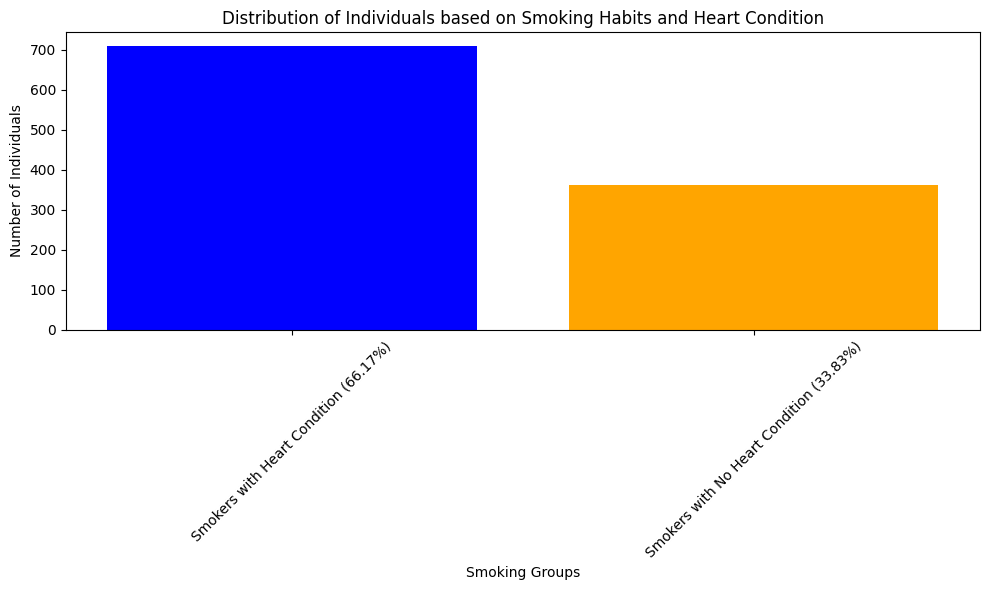

In [22]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="monty",
    password="sushiSQL",
    database="HealthCareAnalytics"
)

# Read the data from the MySQL table into a pandas DataFrame
query = "SELECT * FROM cdc_cigar_use"
df = pd.read_sql(query, conn)
conn.close()

# Filter the data based on smoking habits and heart condition
df_encoded = pd.get_dummies(df, columns=['ShortQuestionText'])
df_encoded['Has_Heart_Condition'] = df_encoded['Lesser_Risk_Low_Confidence_Limit'] > 95.5

# Combine current and frequent smokers
smokers_with_heart_condition = df_encoded[
    ((df_encoded['ShortQuestionText_Current daily cigar use'] == 1) | (df_encoded['ShortQuestionText_Current cigar use'] == 1) |
    (df_encoded['ShortQuestionText_Frequent cigar use'] == 1)) &
    (df_encoded['Has_Heart_Condition'] == True)
]

smokers_with_no_heart_condition = df_encoded[
    ((df_encoded['ShortQuestionText_Current daily cigar use'] == 1) | (df_encoded['ShortQuestionText_Current cigar use'] == 1) |
    (df_encoded['ShortQuestionText_Frequent cigar use'] == 1)) &
    (df_encoded['Has_Heart_Condition'] == False)
]

# Calculate counts or percentages
total_individuals = len(df_encoded)
smokers_with_heart_condition_count = len(smokers_with_heart_condition)
smokers_with_no_heart_condition_count = len(smokers_with_no_heart_condition)

# Calculate percentages
smokers_with_heart_condition_percentage = (smokers_with_heart_condition_count / total_individuals) * 100
smokers_with_no_heart_condition_percentage = (smokers_with_no_heart_condition_count / total_individuals) * 100

# Create a colorful bar chart with percentages in the labels
plt.figure(figsize=(10, 6))
categories = [
    f"Smokers with Heart Condition ({smokers_with_heart_condition_percentage:.2f}%)",
    f"Smokers with No Heart Condition ({smokers_with_no_heart_condition_percentage:.2f}%)"
]
counts = [smokers_with_heart_condition_count, smokers_with_no_heart_condition_count]
colors = ['blue', 'orange']

plt.bar(categories, counts, color=colors)
plt.xlabel('Smoking Groups')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Individuals based on Smoking Habits and Heart Condition')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
